# MIE1622 - COMPUTATIONAL FINANCE AND RISK MANAGEMENT
# ASSIGNMENT 4
# GOKUL RAVI - 1008312309

In [1]:
#importing libraries
import numpy as np
from numpy import *
import scipy.stats as si
from scipy.stats import norm
import matplotlib.pyplot as plt

### IMPLEMENT PRICE FUNCTIONS

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations
# Pricing a Barrier option using Monte Carlo simulations
S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [3]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    c = (S0 * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))     #Call option
    p = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S0 * si.norm.cdf(-d1, 0.0, 1.0))   #Put option

    return c, p

In [4]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):

    paths = np.zeros((numSteps + 1, numPaths))        #Paths for storing simulation data points
    dT = T / numSteps                                 #Time increment
    paths[0] = [S0] * numPaths                        #initial price

    #Stock Price MC Simulation
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1))

    #Call and Put Option Prices
    CallPayoffT = np.maximum(paths[numSteps,:] - K, 0)
    PutPayoffT = np.maximum(K-paths[numSteps,:], 0)


    c = np.mean(CallPayoffT) * np.exp(-r * T)
    p = np.mean(PutPayoffT) * np.exp(-r * T)

    return c, p, paths

In [5]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):

    paths = np.zeros((numSteps + 1, numPaths))       #Paths for storing simulation data points
    dT = T / numSteps                                #Time increment
    paths[0] = [S0] * numPaths                       #initial price

    #Monte Carlo simulation of stock prices
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1))
    barrier_option = np.zeros(numPaths)

    for i in range(numPaths):
        index = np.array(np.where(paths[:,i] > Sb))
        if index.size:
            barrier_option[i] = 1
        else:
            barrier_option[i] = 0

    #Call and Put Option Prices
    CallPayoffT = barrier_option * (np.maximum(paths[numSteps,:] - K, 0))
    PutPayoffT = barrier_option * (np.maximum(K-paths[numSteps,:], 0))

    c = np.exp(-r * T)*np.mean(CallPayoffT)
    p = np.exp(-r * T)*np.mean(PutPayoffT)

    return c, p

### ANALYZE RESULTS

In [35]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations
np.random.seed(42)
numSteps = 12;
numPaths = 100000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, path_1_step = \
MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# # Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, path_multi_step = \
MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# # Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# # Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)


print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price), '\n')

print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step))
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step))
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step))
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step), '\n')

print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step))
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step))
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step))
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step), '\n')

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455 

One-step MC price of an European call option is 8.041620675135178
One-step MC price of an European put option is 7.898061476943745
Multi-step MC price of an European call option is 7.937582608124829
Multi-step MC price of an European put option is 7.950177957941281 

One-step MC price of an Barrier call option is 7.779557289972446
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.015386639375572
Multi-step MC price of an Barrier put option is 1.2838433162200915 



#### PLOT RESULTS

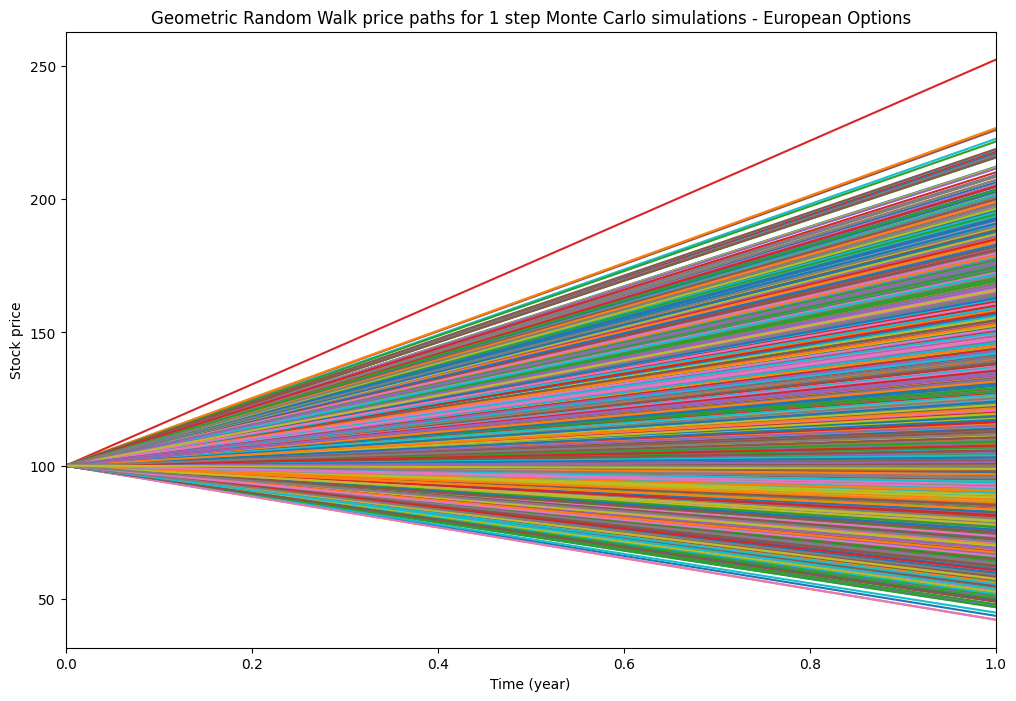

In [36]:
plt.figure(figsize=(12,8))
plt.plot(path_1_step[:,0:-1])
plt.xlim([0, 1])
plt.ylabel("Stock price")
plt.xlabel("Time (year)")
plt.title("Geometric Random Walk price paths for 1 step Monte Carlo simulations - European Options")
plt.show()

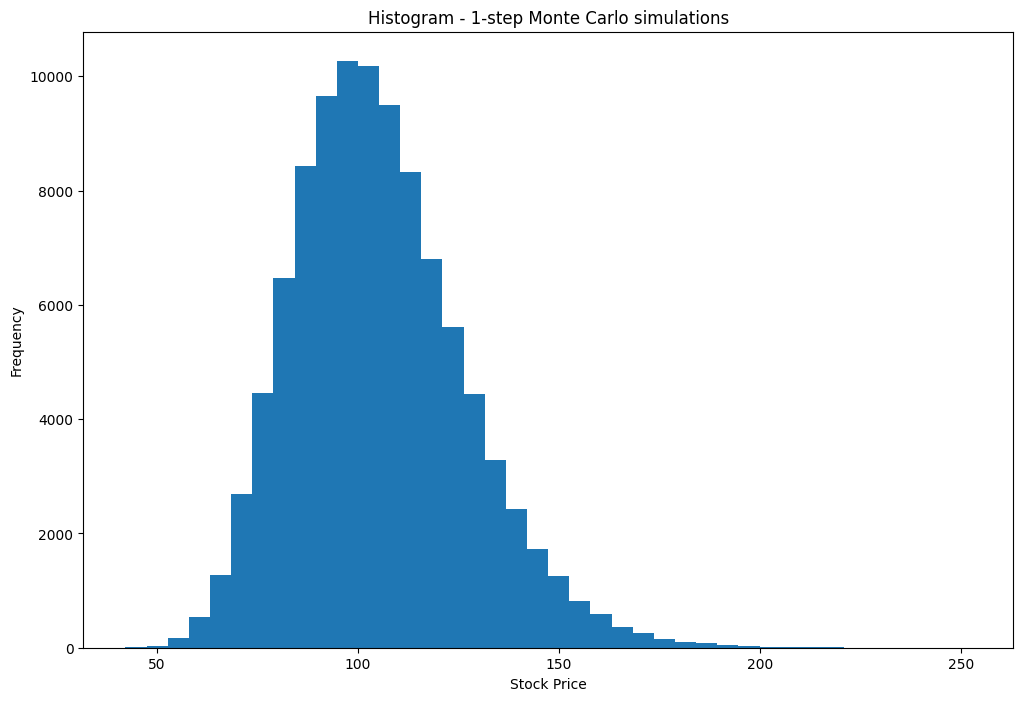

In [37]:
# Histogram of One-Step Monte-Carlo Simulation
hist_prices = path_1_step[-1, :]

# Create a histogram of the final stock prices
plt.figure(figsize = (12,8))
plt.hist(hist_prices, bins=40)
plt.title("Histogram - 1-step Monte Carlo simulations")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.show()

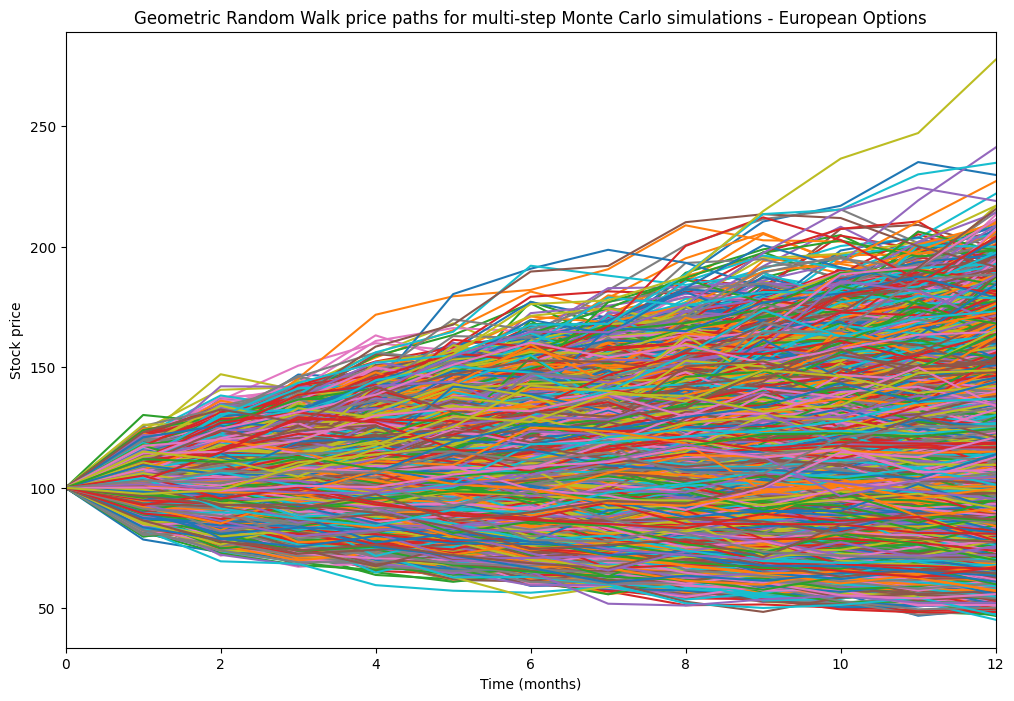

In [38]:
plt.figure(figsize=(12,8))
plt.plot(path_multi_step[:,0:-1])
plt.xlim([0, numSteps])
plt.ylabel("Stock price")
plt.xlabel("Time (months)")
plt.title("Geometric Random Walk price paths for multi-step Monte Carlo simulations - European Options")
plt.show()

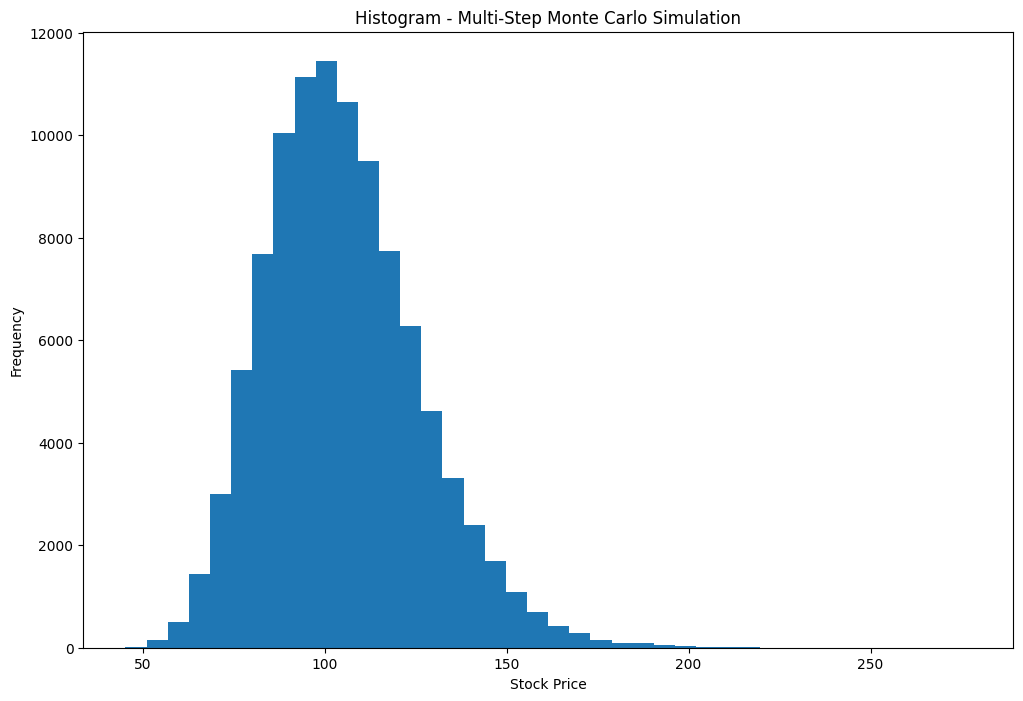

In [39]:
# Histogram of Multi-Step Monte-Carlo Simulation
hist_prices_1 = path_multi_step[-1, :]

# Create a histogram of the final stock prices
plt.figure(figsize = (12, 8))
plt.hist(hist_prices_1, bins=40)
plt.title("Histogram - Multi-Step Monte Carlo Simulation")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.show()

### PRICES OF BARRIER OPTIONS WITH VOLATITLITY INCREASED AND DECREASED

In [40]:
# Implement your one-step Monte Carlo pricing procedure for 10% increased volatility Barrier option
callMC_Barrier_Knockin_Price_1_step_increase, putMC_Barrier_Knockin_Price_1_step_increase = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for 10% increased volatility Barrier option
callMC_Barrier_Knockin_Price_multi_step_increase, putMC_Barrier_Knockin_Price_multi_step_increase = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for 10% decreased volatility Barrier option
callMC_Barrier_Knockin_Price_1_step_decrease, putMC_Barrier_Knockin_Price_1_step_decrease = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for 10% decreased volatility Barrier option
callMC_Barrier_Knockin_Price_multi_step_decrease, putMC_Barrier_Knockin_Price_multi_step_decrease = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, numSteps, numPaths)

print('One-step MC price of an Barrier call option with 10% increased volatility is ' + str(callMC_Barrier_Knockin_Price_1_step_increase))
print('One-step MC price of an Barrier put option with 10% increased volatility is ' + str(putMC_Barrier_Knockin_Price_1_step_increase))
print('Multi-step MC price of an Barrier call option with 10% increased volatility is ' + str(callMC_Barrier_Knockin_Price_multi_step_increase))
print('Multi-step MC price of an Barrier put option with 10% increased volatility is ' + str(putMC_Barrier_Knockin_Price_multi_step_increase), '\n')

print('One-step MC price of an Barrier call option with 10% decreased volatility is ' + str(callMC_Barrier_Knockin_Price_1_step_decrease))
print('One-step MC price of an Barrier put option with 10% decreased volatility is ' + str(putMC_Barrier_Knockin_Price_1_step_decrease))
print('Multi-step MC price of an Barrier call option with 10% decreased volatility is ' + str(callMC_Barrier_Knockin_Price_multi_step_decrease))
print('Multi-step MC price of an Barrier put option with 10% decreased volatility is ' + str(putMC_Barrier_Knockin_Price_multi_step_decrease))

One-step MC price of an Barrier call option with 10% increased volatility is 8.588979441115416
One-step MC price of an Barrier put option with 10% increased volatility is 0.0
Multi-step MC price of an Barrier call option with 10% increased volatility is 8.710718385167223
Multi-step MC price of an Barrier put option with 10% increased volatility is 1.607983401832636 

One-step MC price of an Barrier call option with 10% decreased volatility is 7.061811256264721
One-step MC price of an Barrier put option with 10% decreased volatility is 0.0
Multi-step MC price of an Barrier call option with 10% decreased volatility is 7.164754633124033
Multi-step MC price of an Barrier put option with 10% decreased volatility is 0.9560986062408716


### STRATEGY TO OBTAIN SAME PRICES

In [32]:
steps = [1, 5, 10, 15]
paths = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

for i in paths:
    for j in steps:
        callMC_European_Price, putMC_European_Price, path = \
                    MC_european_price(S0, K, T, r, mu, sigma, j, i)

        if abs(call_BS_European_Price - callMC_European_Price) < 0.01 and (putBS_European_Price - putMC_European_Price) < 0.01:

            print("Optimal steps:", j)
            print("Optimal scenarios:", i, "\n")

            print("MC price of an European call option:", callMC_European_Price)
            print("Black-Scholes price of an European call option:", call_BS_European_Price, "\n")

            print("MC price of an European put option:", putMC_European_Price)
            print("Black-Scholes price of an European put option:", putMC_European_Price, "\n")
            break
    else:
        continue
    break

Optimal steps: 10
Optimal scenarios: 1000000 

MC price of an European call option: 8.013819995532785
Black-Scholes price of an European call option: 8.021352235143176 

MC price of an European put option: 7.900333482808956
Black-Scholes price of an European put option: 7.900333482808956 

